In [98]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [99]:
from tensorflow.keras import models, layers

In [100]:
Image_Size=256
Batch_Size=32

In [101]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PatatoLeafDataSet",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 2153 files belonging to 3 classes.


In [102]:
className=dataset.class_names
className

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

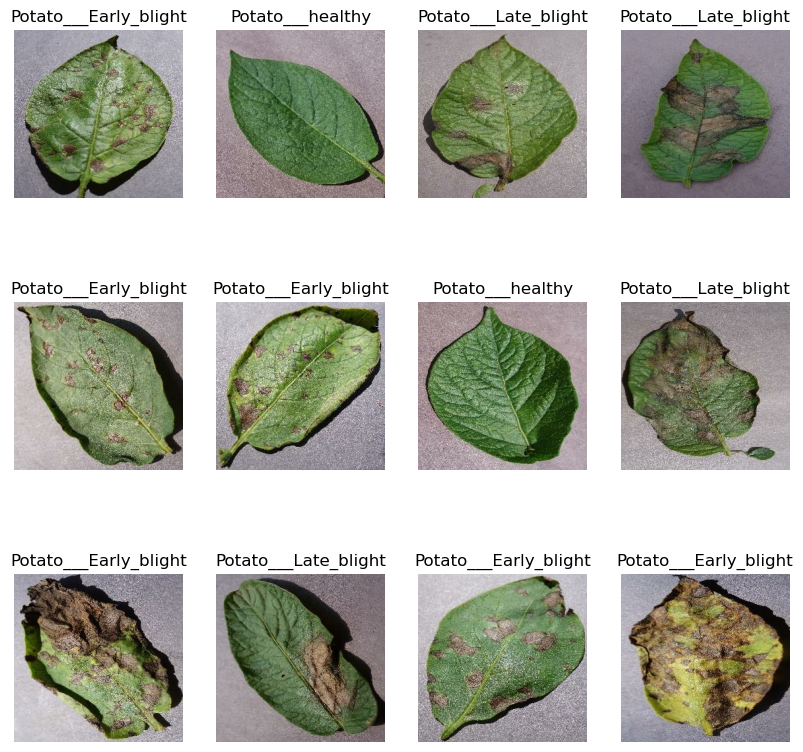

In [103]:
plt.figure(figsize=(10,10))
for batch_Image,batch_lable in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(className[batch_lable[i]])
        plt.imshow(batch_Image[i].numpy().astype("uint8"))
        plt.axis("off")

In [104]:
# calculate Training 80% , Testing 10%  , Validation 10%

In [105]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [106]:
train_ds=dataset.take(54)
len(train_ds)

54

In [107]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [108]:
valide_size=0.1
len(dataset)*valide_size


6.800000000000001

In [109]:
valide_ds=dataset.take(6)
len(valide_ds)

6

In [110]:
test_ds=test_ds.skip(6)

In [111]:
len(test_ds)

8

In [112]:
def dataset_preprocessing(ds,train_split=0.8, valide_splite=0.1,test_splite=0.1, shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    # print(train_size)
    valide_size=int(valide_splite*ds_size)
    # print(valide_size)
    train_ds=ds.take(train_size)
    valide_ds=ds.skip(train_size).take(valide_size)
    test_ds=ds.skip(train_size).skip(valide_size)
    return train_ds,valide_ds,test_ds

In [113]:
train_ds,valide_ds,test_ds=dataset_preprocessing(dataset)

In [114]:
print(len(train_ds))
print(len(valide_ds))
len(test_ds)

54
6


8

In [115]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valide_ds=valide_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [116]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(Image_Size,Image_Size),
    layers.Rescaling(1.0/255)
])

In [117]:
data_agumentation=tf.keras.Sequential([
    layers.RandomFlip("Horizontal_and_Vertical"),
    layers.RandomRotation(0.2)
])

In [118]:

model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(Image_Size,Image_Size,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
])

In [119]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.build(input_shape=((256,256,3)))

ValueError: Input 0 with name 'None' of layer 'conv2d_40' is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (256, 256, 3)